# Titanic Survival prediction

## using Logistic Regression 

At first step we have to download and import necessery data 

In [13]:
#Importing necessery libraries
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

%matplotlib inline

In [4]:
#importing data 
titanic = pd.read_csv('train.csv') #import 'train.csv' file

In [6]:
#Let's see head of the data
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In next step we will make some visualization of our data


<AxesSubplot:xlabel='Survived', ylabel='count'>

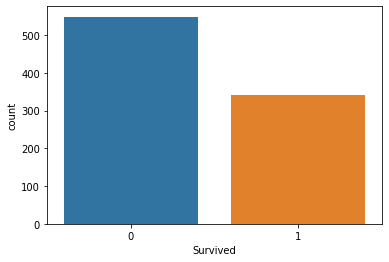

In [7]:
sns.countplot(x = 'Survived', data = titanic)



On this plot we can see the more people do not survive Titanic crash

Now we would like to see which gender more survived

<AxesSubplot:xlabel='Survived', ylabel='count'>

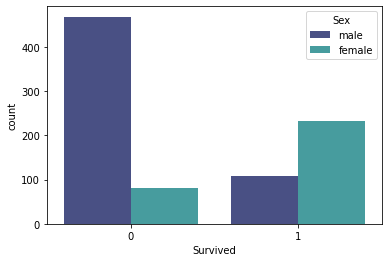

In [14]:
sb.countplot(x = 'Survived', hue = 'Sex', data = titanic, palette = 'mako')



Females are more likely to survive.

What about siblings and parents on the board?


<AxesSubplot:xlabel='SibSp', ylabel='count'>

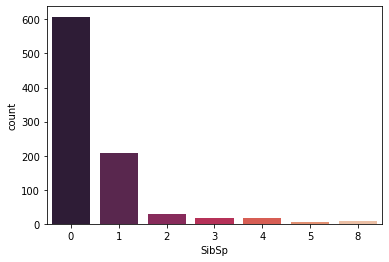

In [18]:
sb.countplot(x = 'SibSp',data = titanic, palette = 'rocket')



<AxesSubplot:ylabel='Frequency'>

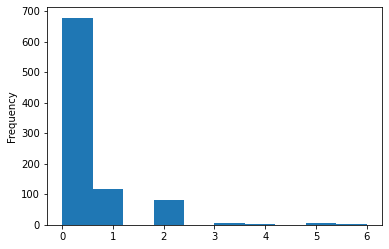

In [19]:
titanic['Parch'].plot.hist()

<AxesSubplot:xlabel='Parch', ylabel='count'>

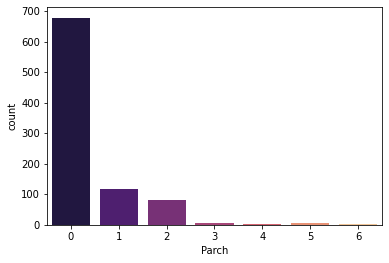

In [20]:
sb.countplot(x = 'Parch',data = titanic, palette = 'magma')



Ok, so now see which class is more likely to survive

<AxesSubplot:xlabel='Survived', ylabel='count'>

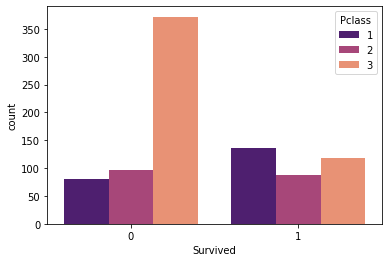

In [15]:
sb.countplot(x = 'Survived', hue = 'Pclass', data = titanic, palette = 'magma')

Noone should be suprised - 1st class is more likely to survive

quick look on age of surviviors

<AxesSubplot:ylabel='Frequency'>

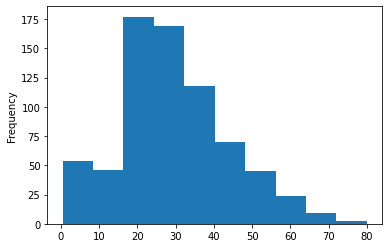

In [16]:
titanic['Age'].plot.hist()

We can also look on fare that passangers paid

<AxesSubplot:ylabel='Frequency'>

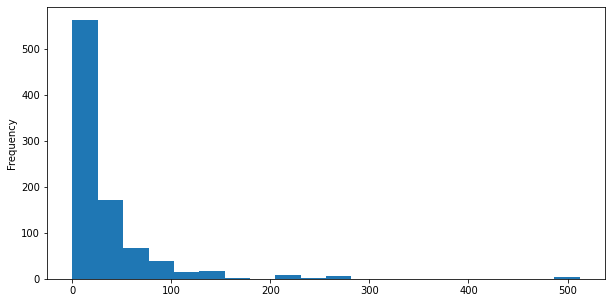

In [17]:
titanic['Fare'].plot.hist(bins=20,figsize=(10,5))

We can see simple dependence - the more you pay, the more likely you are to survive

When we look one more time at our data set we have too many data that we don't need it so we have to delete it.

In [52]:
#We dont need to know name, passener id, ticket and cabin so using .drop I will delete this colums
titanic.drop(['Name','PassengerId','Ticket','Cabin'], axis=1, inplace = True)

KeyError: "['Name' 'PassengerId' 'Ticket' 'Cabin'] not found in axis"

In [26]:
titanic=pd.get_dummies(titanic)
titanic.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,1,38.0,1,0,71.2833,1,0,1,0,0
2,1,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,1,35.0,1,0,53.1000,1,0,0,0,1
4,0,3,35.0,0,0,8.0500,0,1,0,0,1


In [55]:
#Feature scallng
titanic['Age']=titanic['Age']/max(titanic['Age'])
titanic['Fare']=titanic['Fare']/max(titanic['Fare'])

In [56]:
titanic.isnull().sum() #See how many values is missing

Survived      0
Pclass        0
Age           0
SibSp         0
Parch         0
Fare          0
Sex_female    0
Sex_male      0
Embarked_C    0
Embarked_Q    0
Embarked_S    0
dtype: int64

we see some missing values so I will delete it

In [29]:
titanic['Age'].fillna(titanic['Age'].median(),inplace = True)

In [30]:
titanic.isnull().sum()

Survived      0
Pclass        0
Age           0
SibSp         0
Parch         0
Fare          0
Sex_female    0
Sex_male      0
Embarked_C    0
Embarked_Q    0
Embarked_S    0
dtype: int64

And it looks much better

### Now is the time to training data and make our model

In [31]:
x = titanic.drop('Survived', axis = 1)
y = titanic['Survived']

In [33]:
#Spliting the data
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 20, random_state = 42)

I will use logistic regression model, in my opinion it is enough for this dataset

In [35]:
from sklearn.linear_model import LogisticRegression as LR
lr = LR()

lr.fit(x_train,y_train)


LogisticRegression()

Ok, so now we are ready to make prediction

In [37]:
predict = lr.predict(x_test)

We can make fast look at prediction report

In [39]:
from sklearn.metrics import classification_report

print(classification_report(y_test,predict))


              precision    recall  f1-score   support

           0       0.83      1.00      0.91        10
           1       1.00      0.80      0.89        10

    accuracy                           0.90        20
   macro avg       0.92      0.90      0.90        20
weighted avg       0.92      0.90      0.90        20



In [40]:
from sklearn.metrics import confusion_matrix as cm
from sklearn.metrics import accuracy_score as asc


In [43]:
print(cm(y_test,predict)) #print confusion matrix

[[10  0]
 [ 2  8]]


In [44]:
print(asc(y_test,predict)) #print accuracy score

0.9


We got 90% of accuracy so is really good score taking into account many other random factors not included in the dataset

## Now is the time to processing test data

In [59]:
#imporitng data
test = pd.read_csv('test.csv')
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


Steps of processing will be the same as train data

In [60]:
ts = test.drop(['PassengerId','Name','Ticket','Cabin'],axis=1)
ts.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.5,0,0,7.8292,Q
1,3,female,47.0,1,0,7.0000,S
2,2,male,62.0,0,0,9.6875,Q
3,3,male,27.0,0,0,8.6625,S
4,3,female,22.0,1,1,12.2875,S


In [61]:
#removing null values
ts['Age'].fillna(tst['Age'].median(),inplace = True)
ts['Fare'].fillna(tst['Fare'].median(),inplace = True)


In [62]:
ts = pd.get_dummies(tst)
ts.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,0.453947,0,0,0.015282,0,1,0,1,0
1,3,0.618421,1,0,0.013663,1,0,0,0,1
2,2,0.815789,0,0,0.018909,0,1,0,1,0
3,3,0.355263,0,0,0.016908,0,1,0,0,1
4,3,0.289474,1,1,0.023984,1,0,0,0,1


In [63]:
#feature scaling
ts['Age']=tst['Age']/max(tst['Age'])
ts['Fare']=tst['Fare']/max(tst['Fare'])

In [64]:
#deleting missing values
ts['Age'].fillna(tst['Age'].median(),inplace = True)
ts['Fare'].fillna(tst['Fare'].median(),inplace = True)

Now we are ready to use our model

In [66]:
predict = lr.predict(ts)

In [67]:
print(predict)

[0 0 0 0 1 0 1 0 1 0 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 0 1 0 0 0 0 0 0 1 0 0 1
 1 0 0 0 0 0 1 1 0 0 0 1 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 1 1 1 0 1 1 1 0 1 1
 1 1 0 1 0 1 0 0 0 0 0 0 1 1 1 0 1 0 1 0 1 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0
 1 1 1 1 0 0 1 1 1 1 0 1 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0
 0 0 1 0 0 1 0 0 1 1 0 1 1 0 1 0 0 1 0 0 1 1 0 0 0 0 0 1 1 0 1 1 0 0 1 0 1
 0 1 0 0 0 0 0 0 0 0 0 1 1 0 1 1 0 0 1 0 1 1 0 1 0 0 0 0 1 0 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1 0 1 1 1 0 1 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 1 0 0 0 1 1 0 1 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0 1 0 0 0 0
 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0
 1 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 1 0 0 0 1 0 1 0 0 1 0 1 1 0 1 0 0 1 1 0
 0 1 0 0 1 1 1 0 0 0 0 0 1 1 0 1 0 0 0 0 1 1 0 0 0 1 0 1 0 0 1 0 1 1 0 0 0
 0 1 1 1 1 1 0 1 0 0 0]


In [69]:
submission = pd.DataFrame({
        "PassengerId": test["PassengerId"],
        "Survived": predict
    })



In [70]:
submission.head()


,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
